In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-internet-usage-data-2023-updated/internet_users.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

# Suppress warnings for specific modules or operations
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*doesn't match format.*")

In [4]:
df=pd.read_csv('/kaggle/input/world-internet-usage-data-2023-updated/internet_users.csv')

In [5]:
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year.1,Users (CIA),Year.2,Notes
0,World,67.4,2023.0,67.4,2023.0,NaN,NaN,NaN
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
4,American Samoa,NaN,NaN,NaN,NaN,18135.0,2021.0,NaN


In [6]:
df.rename(columns={"Year.1":"Year_1","Year.2":"Year_2"},inplace=True)

In [7]:
df.columns

Index(['Location', 'Rate (WB)', 'Year', 'Rate (ITU)', 'Year_1', 'Users (CIA)',
       'Year_2', 'Notes'],
      dtype='object')

In [8]:
df.isnull().sum()

Location         0
Rate (WB)       29
Year            29
Rate (ITU)      11
Year_1          11
Users (CIA)      6
Year_2           7
Notes          236
dtype: int64

In [9]:
df['Rate (WB)']=df['Rate (WB)'].fillna(df['Rate (WB)'].mean())

In [10]:
df.shape

(238, 8)

In [11]:
df=df.dropna(subset=['Year','Year_1','Year_2'])

In [12]:
df.shape

(207, 8)

In [13]:
df.isnull().sum()

Location         0
Rate (WB)        0
Year             0
Rate (ITU)       0
Year_1           0
Users (CIA)      0
Year_2           0
Notes          207
dtype: int64

In [14]:
df.drop('Notes',axis=1)

,Location,Rate (WB),Year,Rate (ITU),Year_1,Users (CIA),Year_2
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0
5,Andorra,94.5,2022.0,94.5,2022.0,74260.0,2021.0
6,Angola,39.3,2022.0,39.3,2022.0,11550000.0,2021.0
...,...,...,...,...,...,...,...
232,Venezuela,61.6,2017.0,61.6,2017.0,22734162.0,2022.0
233,Vietnam,78.6,2022.0,78.1,2023.0,71780000.0,2021.0
235,Yemen,26.7,2017.0,17.7,2022.0,8229624.0,2022.0
236,Zambia,31.2,2022.0,31.2,2022.0,3990000.0,2021.0


In [15]:
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year_1,Users (CIA),Year_2,Notes
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
5,Andorra,94.5,2022.0,94.5,2022.0,74260.0,2021.0,NaN
6,Angola,39.3,2022.0,39.3,2022.0,11550000.0,2021.0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 1 to 237
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     207 non-null    object 
 1   Rate (WB)    207 non-null    float64
 2   Year         207 non-null    float64
 3   Rate (ITU)   207 non-null    float64
 4   Year_1       207 non-null    float64
 5   Users (CIA)  207 non-null    float64
 6   Year_2       207 non-null    float64
 7   Notes        0 non-null      object 
dtypes: float64(6), object(2)
memory usage: 14.6+ KB


In [17]:
df.describe()

,Rate (WB),Year,Rate (ITU),Year_1,Users (CIA),Year_2
count,207.000000,207.000000,207.000000,207.000000,2.070000e+02,207.000000
mean,70.656039,2021.487923,70.221256,2021.806763,2.339401e+07,2021.028986
std,25.154313,1.726042,25.436069,1.539560,8.892435e+07,0.194912
min,10.000000,2016.000000,7.500000,2016.000000,7.920000e+03,2020.000000
25%,54.300000,2021.000000,54.300000,2022.000000,7.445000e+05,2021.000000
50%,78.700000,2022.000000,78.700000,2022.000000,4.320000e+06,2021.000000
75%,90.000000,2022.000000,89.900000,2023.000000,1.283400e+07,2021.000000
max,100.000000,2023.000000,100.000000,2023.000000,1.022000e+09,2022.000000


In [18]:
obj=df.select_dtypes(include=['object'])

In [19]:
floa=df.select_dtypes(include=['float64'])

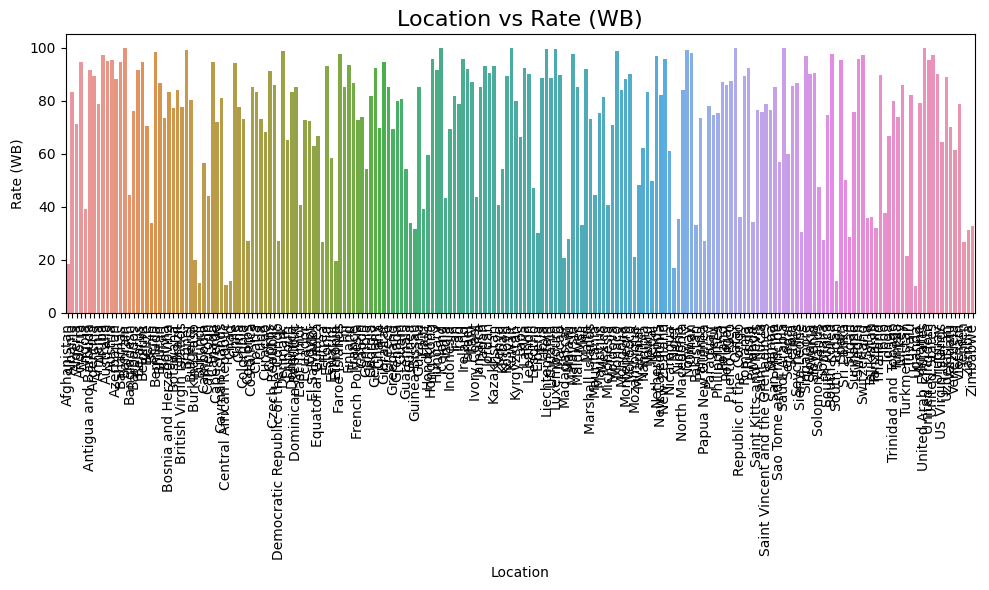

In [20]:
# 1. Bar Plot for Location vs Rate (WB)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Location', y='Rate (WB)')
plt.title('Location vs Rate (WB)', fontsize=16)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

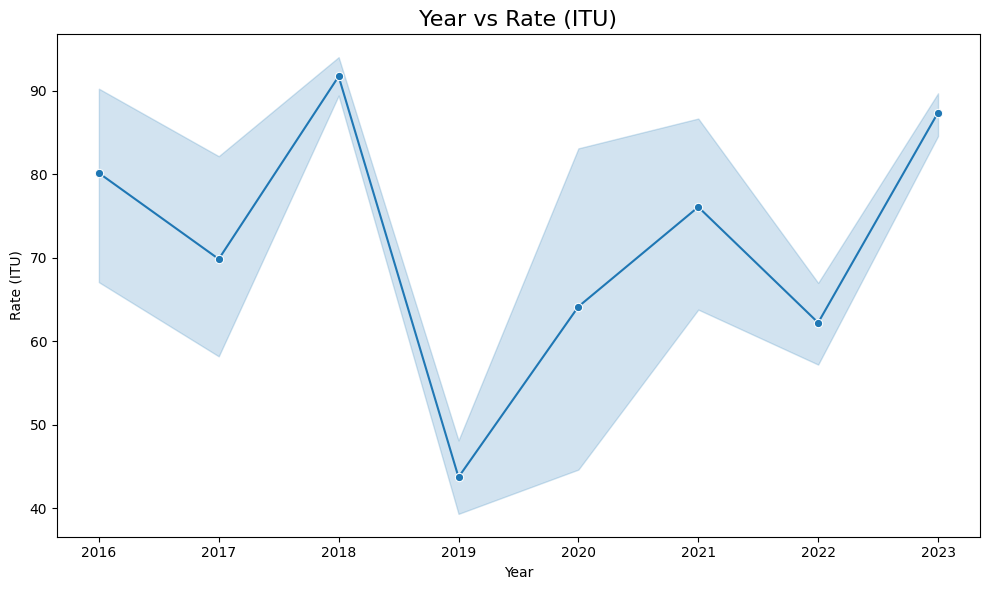

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rate (ITU)', marker='o')
plt.title('Year vs Rate (ITU)', fontsize=16)
plt.tight_layout()
plt.show()

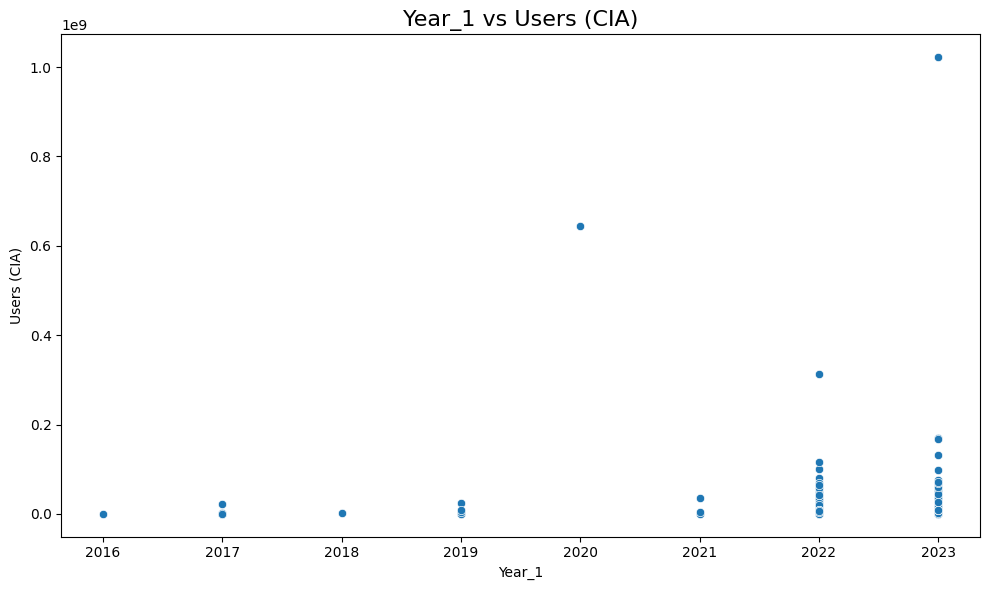

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year_1', y='Users (CIA)')
plt.title('Year_1 vs Users (CIA)', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

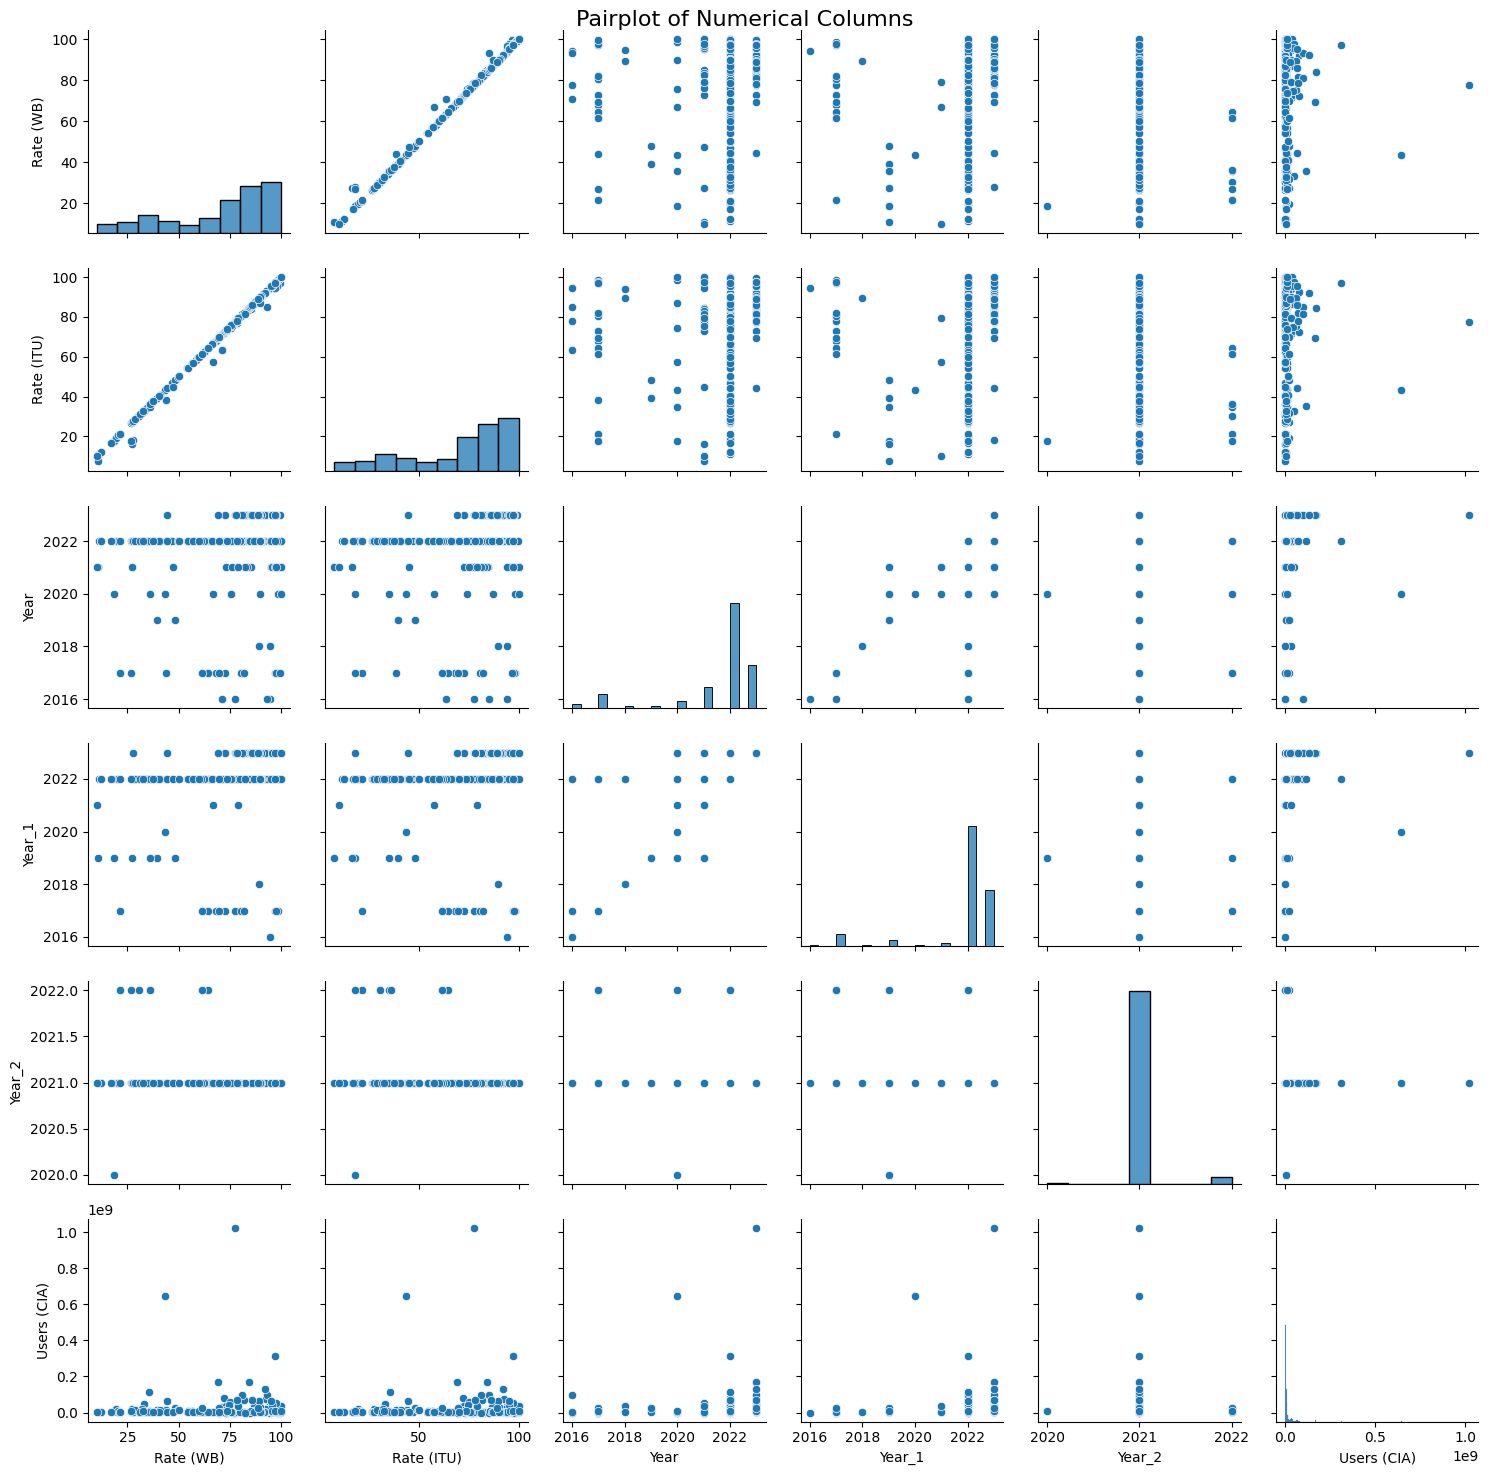

In [23]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Rate (WB)', 'Rate (ITU)', 'Year', 'Year_1', 'Year_2', 'Users (CIA)']])
plt.suptitle('Pairplot of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()